###

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rebound as rb
import reboundx as rx

In [2]:
tup_num = 25 
e_b = np.linspace(0, 0.7, tup_num)
a_p = np.linspace(1, 5, tup_num)

Np = 4

Qex = []
for x in range(4,7):
    Q = 10**x
    Qex.append(Q)

tup_list = []

for Q in Qex:
    for e in e_b:
        for a in a_p:
            tup_list.append((Q,e,a,Np))

Ne = len(e_b)
Na = len(a_p)
Nq = len(Qex)

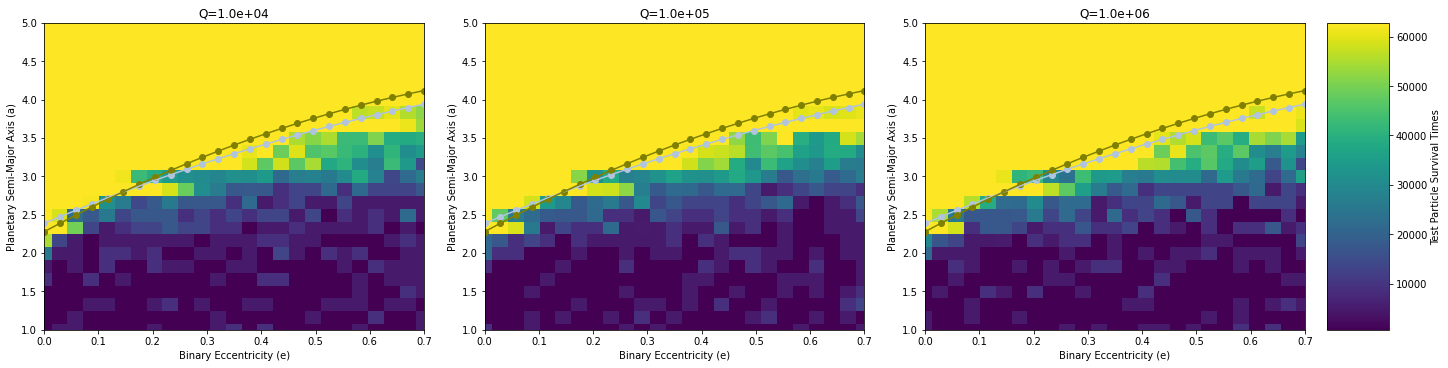

In [3]:
sunnyplot = np.loadtxt('SUNNY_map_tup25plan15_Qi10000_Qf1000000.npy')

fig, ax = plt.subplots(1, Nq, figsize=(20,5), constrained_layout=True)
ax = ax.ravel()

SurvTimeAll = np.reshape(sunnyplot, [Nq,Ne,Na])
       
SurvTimeArr = [SurvTimeAll[i,:,:] for i in range(Nq)]

for i in range(Nq):
    pcm = ax[i].pcolormesh(e_b, a_p, SurvTimeArr[i].T, shading='auto')
    
    a_b = 2.278 + 3.824*e_b - 1.71*(e_b**2)
    a_c = 1.6 + 5.1*e_b + (- 2.22*(e_b**2)) + 4.12*0.5 + (- 4.27*e_b*0.5) + (- 5.09*(0.5**2)) + 4.61*(e_b**2)*(0.5**2)
    
    ax[i].plot(e_b, a_c, color='lightsteelblue')
    ax[i].scatter(e_b, a_c, color='lightsteelblue')

    ax[i].plot(e_b, a_b, color='olive')
    ax[i].scatter(e_b, a_b, color='olive')
    
    ax[i].set_title('Q={:.1e}'.format(Qex[i]))
    ax[i].set_xlabel('Binary Eccentricity (e)')
    ax[i].set_ylabel('Planetary Semi-Major Axis (a)')
    ax[i].set_xlim(0.0,0.7)
    ax[i].set_ylim(1,5)

plt.colorbar(pcm, location='right',label='Test Particle Survival Times') 


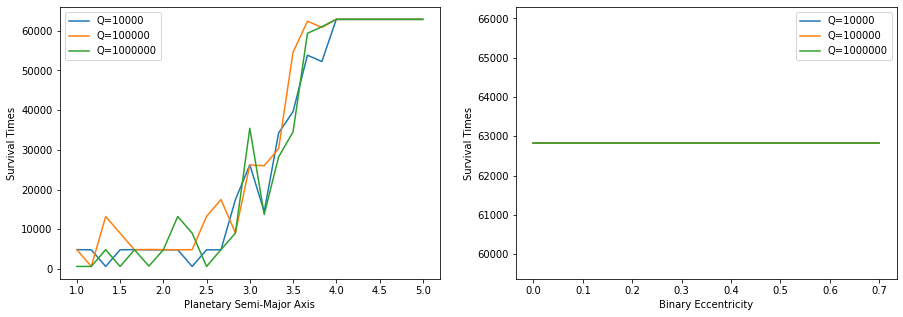

In [61]:
""" 1D slicing showing simulation the for binary eccentricity and planetary semi-major axis values at point of 
ejection from simulation """

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
for i in range(Nq):
    semi = SurvTimeArr[i][-1,:]
    ax1.plot(a_p, semi, label=f"Q={Qex[i]}")
    ax1.set_xlabel("Planetary Semi-Major Axis") #initial binary eccentricity
    ax1.set_ylabel("Survival Times")
    ax1.legend()

    e =  SurvTimeArr[i][:,-1]
    ax2.plot(e_b, e, label=f"Q={Qex[i]}")
    ax2.set_xlabel("Binary Eccentricity") #initialy planetary semi major axis
    ax2.set_ylabel("Survival Times")
    ax2.legend()

In [48]:
print(a_p)
print(np.shape(SurvTimeArr[i][-1,:]))
#for i in range(Nq):
#    print(SurvTimeArr[i][-1,:])

[1.         1.16666667 1.33333333 1.5        1.66666667 1.83333333
 2.         2.16666667 2.33333333 2.5        2.66666667 2.83333333
 3.         3.16666667 3.33333333 3.5        3.66666667 3.83333333
 4.         4.16666667 4.33333333 4.5        4.66666667 4.83333333
 5.        ]
(25,)


In [14]:
np.shape(SurvTimeArr)

(3, 25, 25)

In [14]:
sa = None

sa = rx.SimulationArchive('eb0.525_ap4.500_Np15.0_tup25.0_Q10000.0_tau0.0030.bin', 
                           rebxfilename='xarchive.bin')

print("Number of snapshots: %d" % len(sa))

# figure out how to access the Hash names, may be useful 

In [28]:
print(sa[10][0].particles[0].params["tctl_k1"]) 

0.035


In [33]:
print(sa[25][0].t) 

25000.000973518963


In [23]:
# Functions to Plot Evolution of Binary: Eccentricity and Semi-Major Axis
# only actually need to plot these values based on data from second binary as the primary is the center
# of the simulation

def binary_semi(archive, extras):
    sim_arc = rx.SimulationArchive(archive, rebxfilename=extras)
    
    x_arr = []
    y_arr = []
    
    for snap in range(len(sim_arc)): 
        base = sim_arc[snap][0].particles[1]
        orb_element = base.a
        time = (sim_arc[snap][0].t)
        
        y_arr.append(orb_element)
        x_arr.append(time)

    #fig = plt.figure(figsize=(50,10))
    
    #plt.xlabel("Orbit Number", fontsize=35)
    #plt.ticklabel_format(useOffset=False)
    #plt.ylabel("Binary Semi-Major Axis", fontsize=35)
    #plt.xticks(fontsize= 35)
    #plt.yticks(fontsize= 35)
    #plt.plot(x_arr,y_arr, color='teal')
    #plt.set_xlim = ([0.5, 2.])
    
    return x_arr, y_arr

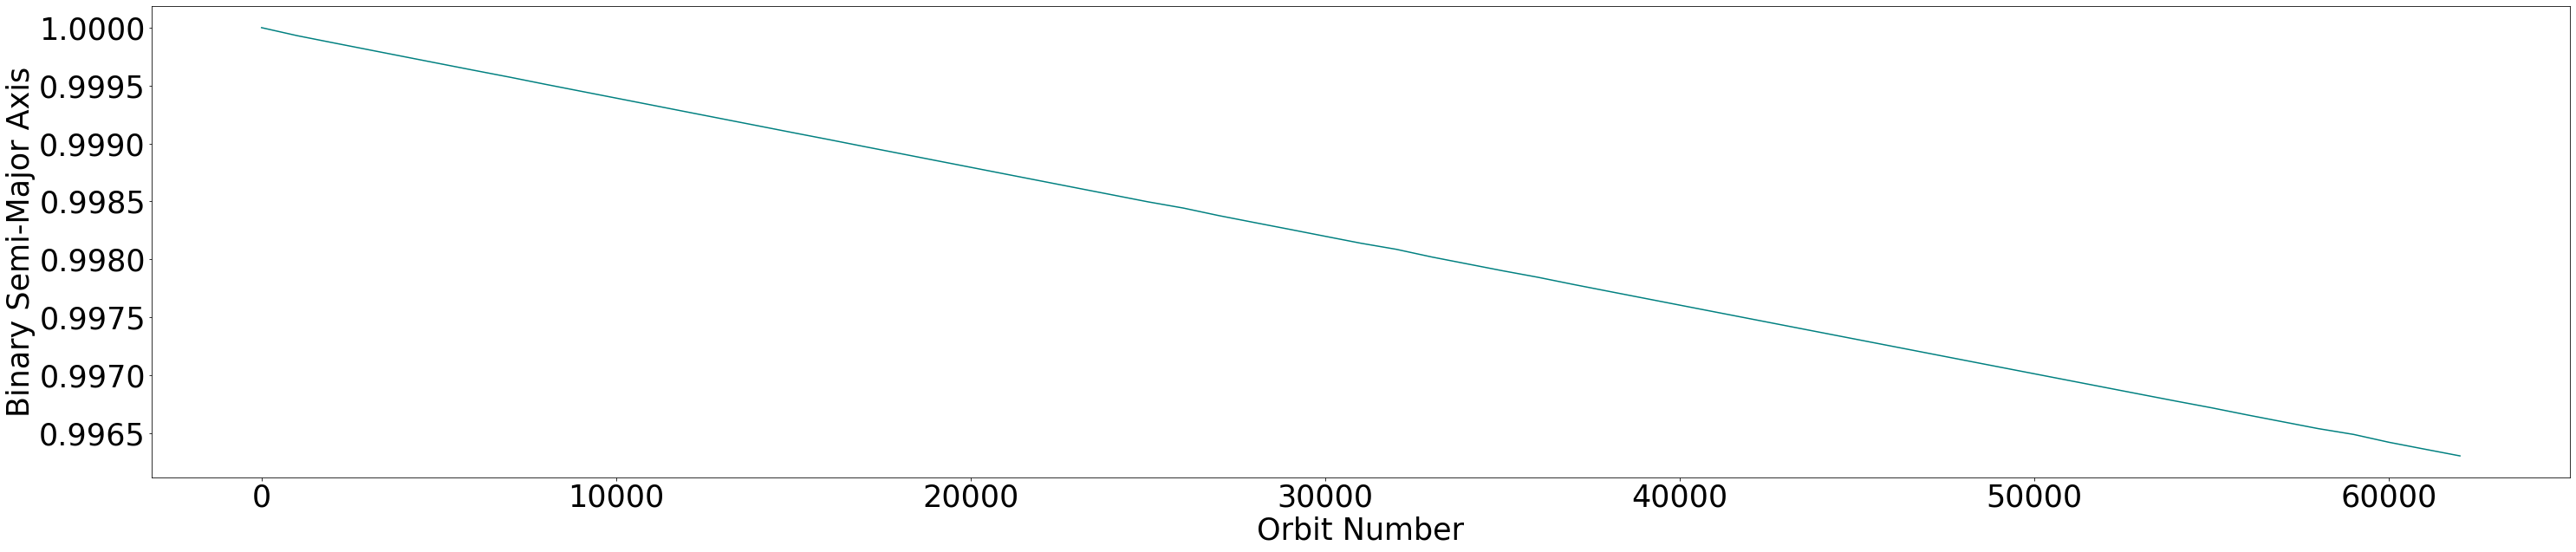

In [24]:
binary_semi('eb0.525_ap4.500_Np15.0_tup25.0_Q10000.0_tau0.0030.bin', 'xarchive.bin')

In [33]:
def binary_ecc(archive, extras):
    sim_arc = rx.SimulationArchive(archive, rebxfilename=extras)
    
    x_arr = []
    y_arr = []
    
    for snap in range(len(sim_arc)): 
        base = sim_arc[snap][0].particles[1]
        orb_element = base.e
        time = (sim_arc[snap][0].t)
        
        y_arr.append(orb_element)
        x_arr.append(time)
        
    fig = plt.figure(figsize=(50,10))
    plt.xlabel("Orbit Number", fontsize=35)
    plt.ylabel("Binary Eccentricity", fontsize=35)
    plt.xticks(fontsize= 35)
    plt.yticks(fontsize= 35)
    plt.plot(x_arr,y_arr, color='green')

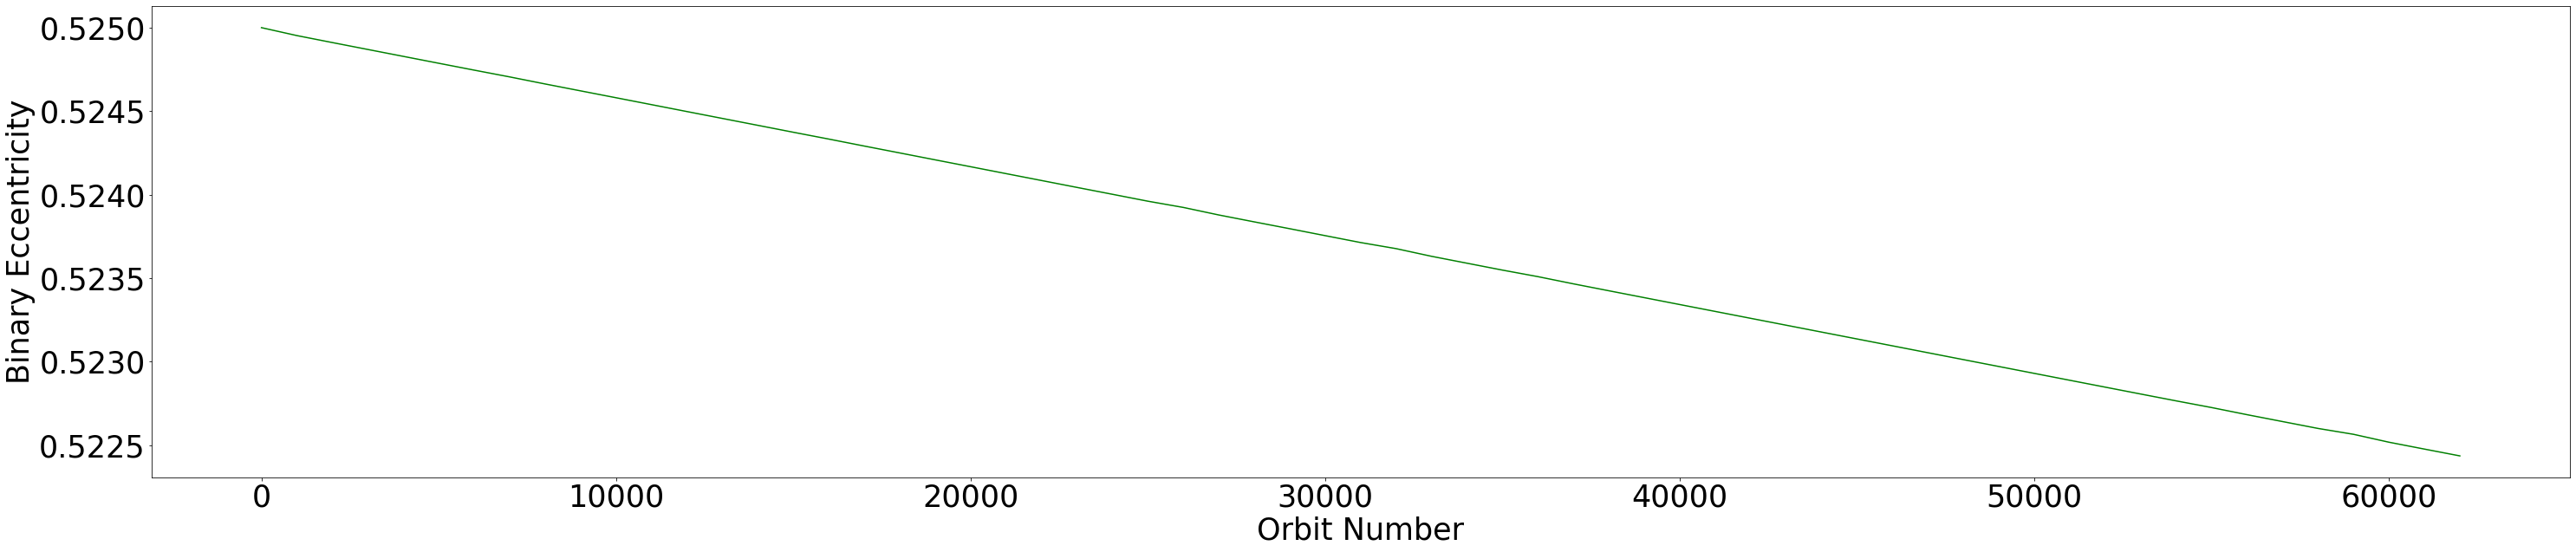

In [34]:
binary_ecc('eb0.525_ap4.500_Np15.0_tup25.0_Q10000.0_tau0.0030.bin', 'xarchive.bin')

In [ ]:
# needs to be assesed 
def orbit(archive):
    sim_arc = rb.SimulationArchive(archive)
    
    x_arr = []
    y_arr = []
    
    for snap in range(len(sim_arc)): 
        
        for i in reversed(range(2, sim_arc[snap].N)):
            base = sim_arc[snap].particles[i]
        
            orb_element = base.e
            time = sim_arc[snap].t
            
            #if orb_element not in y_arr:
            y_arr.append(orb_element)
            #if time not in x_arr:
            x_arr.append(time)
    
    fig = plt.figure(figsize=(50,20))
    plt.xlabel("t", fontsize=35)
    plt.ylabel("e", fontsize=35)
    plt.xticks(fontsize= 35) 
    plt.yticks(fontsize= 35)
    #plt.xlim([0, 650])
    #plt.ylim([-55,40])
    
    plt.plot(x_arr,y_arr)
    plt.scatter(x_arr,y_arr, color='orange') #, marker=",") #s=2
    #print(y_arr)

In [13]:
# Plot Mean Motion vs Spin Rate 

# Mean Motion n_b = np.sqrt(G(M1 + M2)/a**3) 

def spin_mm(sim, archive):
    
    sim_arc = rx.SimulationArchive(sim,rebxfilename=archive)
    
    #rx.SimulationArchive('eb0.525_ap4.500_Np15.0_tup25.0_Q10000.0_tau0.0030.bin'
    #                     , rebxfilename='xarchive.bin')
    x_arr = []
    y_arr = []
    
    for snap in range(len(sim_arc)): 
        base = sim_arc[snap][0]
        
        mean_mtn = base.particles[1].n
        spin = base.particles[0].params["Omega"]
        
        # time = (sim_arc[snap].t)/1e4
        
        y_arr.append(mean_mtn)
        x_arr.append(spin)
        
    fig = plt.figure(figsize=(50,10))
    plt.ticklabel_format(useOffset=False)
    plt.xlabel("Spin Rate (Omega)", fontsize=35)
    plt.ylabel("Binary Mean Motion (nb)", fontsize=35)
    plt.xticks(fontsize= 35)
    plt.yticks(fontsize= 35)
    plt.plot(x_arr,y_arr, color='green')
    
    # do (x - y) and (y - x) to see the dissipation
    # for i in x_arr:
        